<center><h1>Assignment 2</h1></center>

## Problem Statement
Implementing Feedforward neural networks with Keras and TensorFlow
1. Import the necessary packages
2. Load the training and testing data (MNIST/CIFAR10)
3. Define the network architecture using Keras
4. Train the model using SGD
5. Evaluate the network
6. Plot the training loss and accuracy

## Notebook Details
1. Author : Varad Girish Mashalkar
2. Branch : Information Technology
3. Division : BE 11
4. Batch : Q11
5. Roll Number : 43335
6. Course : Laboratory Practice 4 (Deep Learning)

## Implementation Details
1. Python version : 3.7.0
2. Tensorflow version : 2.0.0

## Imports
1. numpy
2. tensorflow
3. matplotlib
4. seaborn

## MNIST dataset
1. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
2. Popularly used for training and testing in machine learning
3. Consists of 60000 training images, 10000 testing images
4. Each image has a dimension of 28 X 28 pixels with no depth (gray scale images)

# 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as tfl
sns.set()
%matplotlib inline

2022-10-17 00:42:35.169801: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 00:42:35.169821: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Checking import version of tensorflow
tf.__version__

'2.7.0'

# 2. Fetching the dataset

In [3]:
dataset = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [4]:
(x_train, y_train), (x_test, y_test) = dataset

In [5]:
print("Training data inputs shape  : ", x_train.shape)
print("Training data targets shape : ", y_train.shape)
print("Testing data inputs shape   : ", x_test.shape)
print("Testing data targets shape  : ", y_test.shape)

Training data inputs shape  :  (60000, 28, 28)
Training data targets shape :  (60000,)
Testing data inputs shape   :  (10000, 28, 28)
Testing data targets shape  :  (10000,)


# 3. Data analysis

### a) Checking maximum and minimum values in dataset

In [6]:
max_val = max([np.max(x_train), np.max(x_test)])
min_val = max([np.min(x_train), np.min(x_test)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  255
Minimum value :  0


### b) Class count in training and testing sets

In [7]:
train_unique_targets, train_targets_frequency = np.unique(y_train, return_counts=True)
test_unique_targets, test_targets_frequency = np.unique(y_test, return_counts=True)

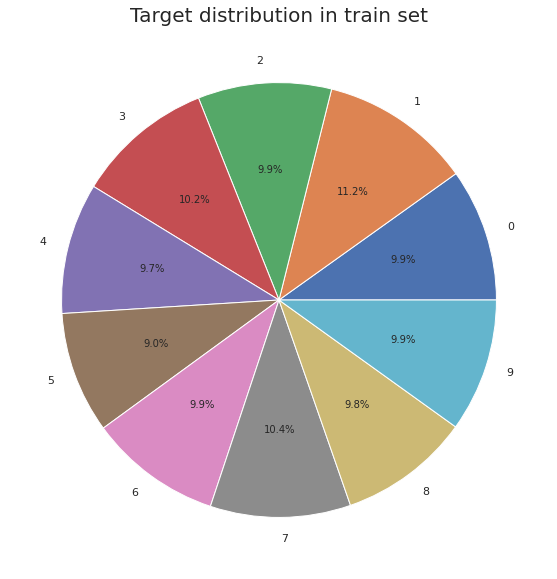

In [8]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=train_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in train set", fontsize=20)
plt.show()

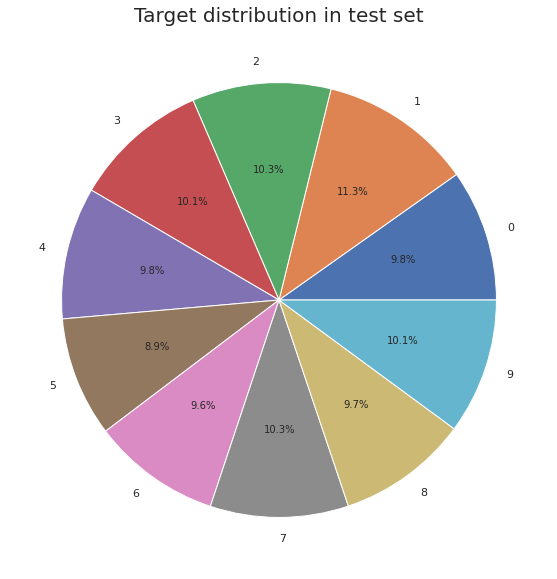

In [9]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=test_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in test set", fontsize=20)
plt.show()

# Observations :

1. Maximum pixel value : 255
2. Minimum pixel value : 0
3. Number of target classes : 10 [0-9]
4. Approximate frequency of classes in training and testing targets : ~10%
5. The dataset is balanced for the number of samples for each class in training and testing dataset
6. Dataset needs to be scaled for better convergence of SGD

# 4. Viewing random data points in dataset 

In [10]:
idx = 1000

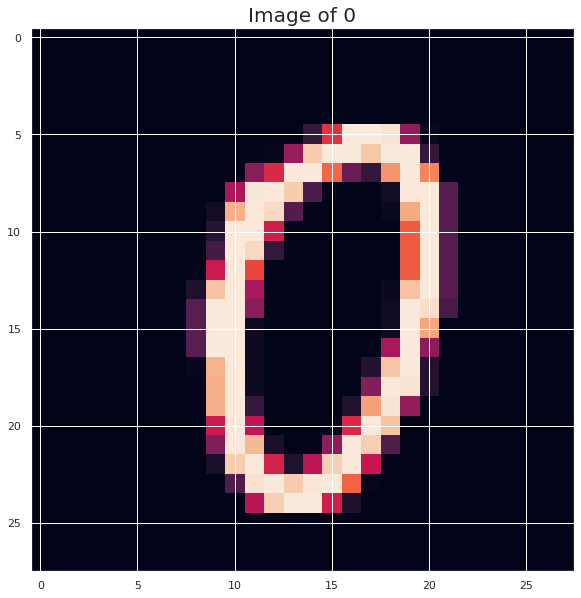

In [11]:
frame = np.float64(x_train[idx])
target = y_train[idx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(frame)
plt.title("Image of {}".format(target), fontsize=20)
plt.show()

# 5. Data preprocessing

## a) Feature scaling

In [12]:
# Scaling train and test inputs for a range of 0 to 1 by dividing by 255 (scalar)
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0
x_train_scaled = x_train_scaled.reshape(
    x_train_scaled.shape[0], 
    x_train_scaled.shape[1], 
    x_train_scaled.shape[2], 
    1
)
x_test_scaled = x_test_scaled.reshape(
    x_test_scaled.shape[0], 
    x_test_scaled.shape[1], 
    x_test_scaled.shape[2], 
    1
)

In [13]:
# Confirming maximum and minimum value in dataset
max_val = max([np.max(x_train_scaled), np.max(x_test_scaled)])
min_val = max([np.min(x_train_scaled), np.min(x_test_scaled)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  1.0
Minimum value :  0.0


# 6. Model Definition

In [14]:
# Defining constants
EPOCHS = 10
BATCH_SIZE = 64

In [15]:
# Defining model Structure
model = tf.keras.models.Sequential([
    tfl.Conv2D(24, kernel_size=5, activation='relu', padding='same', input_shape=(28, 28, 1)),
    tfl.MaxPool2D((2, 2)),
    tfl.Conv2D(48, kernel_size=5, activation='relu', padding='same'),    
    tfl.MaxPool2D((2, 2)),
    tfl.Conv2D(64, kernel_size=5, activation='relu', padding='same'),
    tfl.MaxPool2D((2, 2), padding='same'),
    tfl.Flatten(),
    tfl.Dense(units=256, activation='relu'),
    tfl.Dense(units=10, activation='softmax')
])

2022-10-17 00:42:42.394318: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-17 00:42:42.394357: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: varadmash-G3-3590
2022-10-17 00:42:42.394366: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: varadmash-G3-3590
2022-10-17 00:42:42.394495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-17 00:42:42.394524: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.76.0
2022-10-17 00:42:42.394531: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.76.0
2022-10-17 00:42:42.394849: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfo

In [16]:
# Compiling model 
model.compile(
    optimizer='sgd',                          # Stochastic Gradient Descent Optimizer
    metrics=['accuracy'],                     # Track accuracy while training
    loss='sparse_categorical_crossentropy'    # Defining loss function
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

# 7. Model Training

In [18]:
history = model.fit(
    x=x_train_scaled, 
    y=y_train,   
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

2022-10-17 00:42:43.751680: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
  2/938 [..............................] - ETA: 1:30 - loss: 2.2999 - accuracy: 0.1562 

2022-10-17 00:42:47.638418: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23990400 exceeds 10% of free system memory.
2022-10-17 00:42:47.645793: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23990400 exceeds 10% of free system memory.
2022-10-17 00:42:47.670975: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15836800 exceeds 10% of free system memory.
2022-10-17 00:42:47.751547: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23990400 exceeds 10% of free system memory.


938/938 [==============================] - 31s 31ms/step - loss: 0.7608 - accuracy: 0.7799
Epoch 2/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1474 - accuracy: 0.9544
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.1009 - accuracy: 0.9692
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0663 - accuracy: 0.9796
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0585 - accuracy: 0.9817
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0514 - accuracy: 0.9842
Epoch 8/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0468 - accuracy: 0.9856
Epoch 9/10
938/938 [==============================] - 31s 34ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 10/10
938/938 [==============================] - 31s 34ms/step - loss: 0.0386 - accurac

# 8. Model testing

In [36]:
results = model.evaluate(x_test_scaled, y_test, batch_size=BATCH_SIZE)

157/157 [==============================] - 1s 8ms/step - loss: 0.0391 - accuracy: 0.9870


In [22]:
_, test_accuracy = results

In [26]:
print("Testing accuracy : ", test_accuracy*100, "%")

Testing accuracy :  98.76999855041504 %


# 9. Plotting training loss and accuracy over epochs

In [32]:
len(history.history['loss'])

10

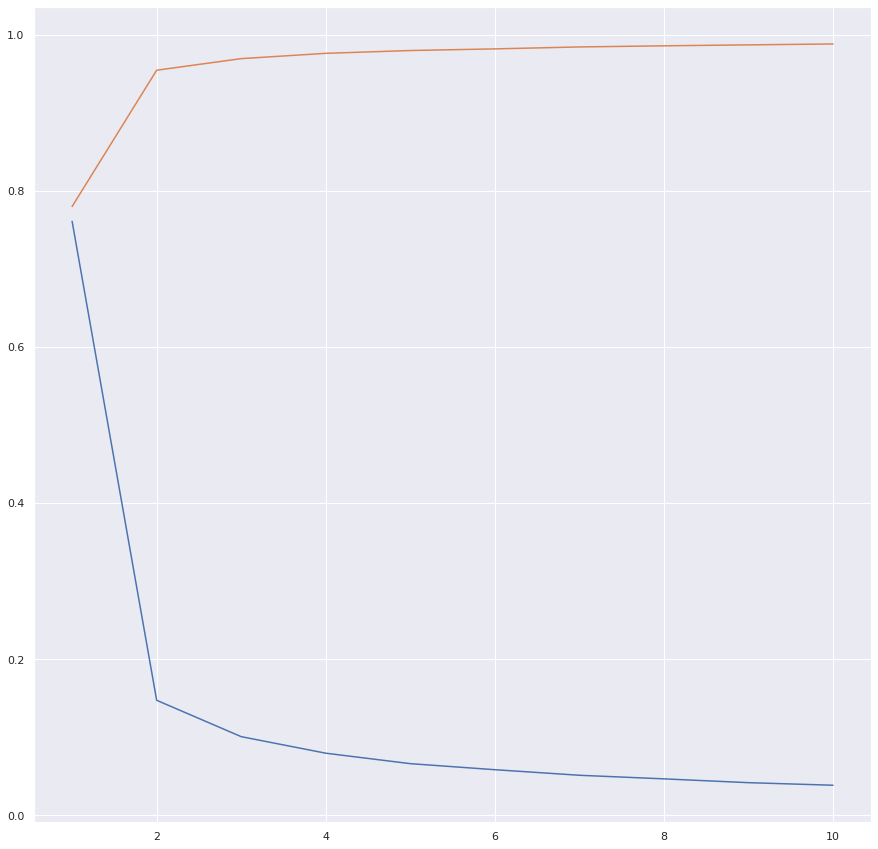

In [35]:
epochs = np.arange(1, 11)
training_loss = history.history["loss"]
training_accuracy = history.history["accuracy"]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.plot(epochs, training_loss,)
ax.plot(epochs, training_accuracy)
plt.show()

# 10. Results

1. Training data final accuracy : 98.80%
2. Testing accuracy : 98.70%

In [48]:
# Observing result on test set
test_idx = 22

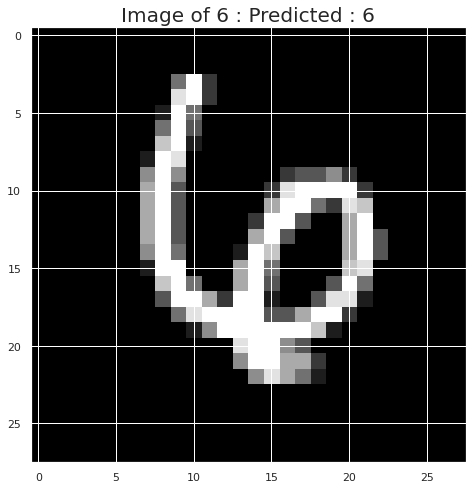

In [49]:
frame = x_test_scaled[test_idx]
target = y_test[test_idx]
prediction = np.argmax(model.predict(frame.reshape((-1, 28, 28, 1))))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.imshow(frame, cmap="gray")
plt.title("Image of {} : Predicted : {}".format(target, prediction), fontsize=20)
plt.show()

<center><h1>End of Notebook</h1></center>